In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn.decomposition import PCA

%matplotlib inline

Let's start with a simple dataset, say we have student's marks dataset recorded for six individual students of their marks in Physics and Maths.

In [2]:
data = pd.DataFrame({"Maths":[10, 11, 8, 3, 1, 2], "Physics":[6, 4, 5, 3, 3.2, 1]}).T
data.columns = ['Student1', 'Student2', 'Student3', 'Student4', 'Student5', 'Student6']
data.head()

,Student1,Student2,Student3,Student4,Student5,Student6
Maths,10.0,11.0,8.0,3.0,1.0,2.0
Physics,6.0,4.0,5.0,3.0,3.2,1.0


If we only recorded marks for Maths, we can plot it on number line.

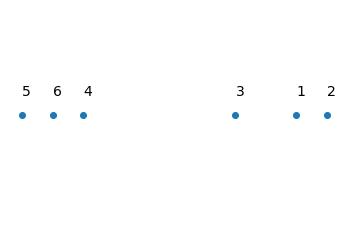

In [3]:
x = data.loc['Maths'].values
y = [0,0,0,0,0,0]
cols = data.columns
plt.scatter(x, y)
for i in range(x.shape[0]):
    plt.annotate(cols[i][-1], (x[i], y[i]+0.01), fontsize=14)
plt.axis('off')
plt.show()

This shows that Student 1,2,3 have relatively high Math scores while Student 4,5,6 have relatively low values.
This simple graph is capable of explaining that Student 1,2 and 3 scored closer to one another than the Students 4,5 and 6.

Now if we recorded scores for two subjects namely 'Maths' and 'Physics', then we can plot it in 2-D graphs.

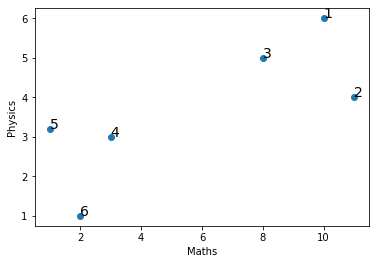

In [4]:
x = data.loc['Maths'].values
y = data.loc['Physics'].values
cols = data.columns
plt.scatter(x, y)
for i in range(x.shape[0]):
    plt.annotate(cols[i][-1], (x[i], y[i]+0.01), fontsize=14)
    
plt.xlabel("Maths")
plt.ylabel("Physics")
plt.show()

`Maths` is on x-axis and spans one of the 2 dimensions on the graph, while `Physics` is on y-axis and spans the other dimension of the 2-D graph.

We can see that the Students 1, 2 and 3 cluster on the right side while Students 4,5,6 on the lower left side of the graph.

Now suppose we add marks for another subject, then we would plot the data on 3D graph.

In [5]:
data.loc['Statistics'] = [12,9,10,2.5,1.3,2]
data.head()

,Student1,Student2,Student3,Student4,Student5,Student6
Maths,10.0,11.0,8.0,3.0,1.0,2.0
Physics,6.0,4.0,5.0,3.0,3.2,1.0
Statistics,12.0,9.0,10.0,2.5,1.3,2.0


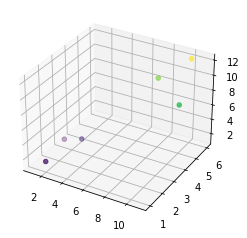

In [6]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
 
x = data.loc['Maths'].values
y = data.loc['Physics'].values
z = data.loc['Statistics'].values
 
ax.scatter3D(x, y, z, c=z)
plt.show()

Here the purplish dots corresponds to low values in `Statistics` and are closer to each other while thre `Yellowish-green` dots have comparatively high values of `Statistics` and the clustered together.

Now if we measure students's scores for one more subject, then it requires plotting in 4D, which is no longer supported.

Here, comes the PCA. 

PCA takes higher dimensional data and returns by transforming it into lower dimensions without losing much of the information. In lower dimensions, it will cluster similiar samples together and also tells that which variable is the most valuable for clustering the data. It also tells how accurate the lower dimension data is by providing ratio of variance along each component(features/variable of reduced dimension data).

# Understanding the working of PCA

To understand how it works, let's take the example of data with two variables; Students' scores recorded in 2 subjects.

In [7]:
data.drop('Statistics', axis=0, inplace=True)

Let's start by plotting the data

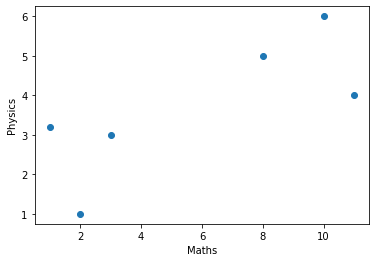

In [8]:
x = data.loc['Maths'].values
y = data.loc['Physics'].values

plt.scatter(x, y)    
plt.xlabel("Maths")
plt.ylabel("Physics")
plt.show()

Then we will calculate the average measurement for Maths and for Physics.

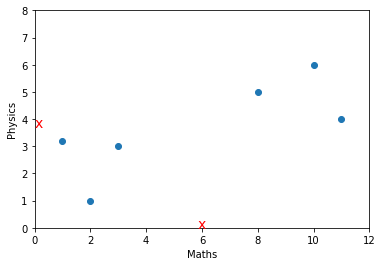

In [9]:
x = data.loc['Maths'].values
y = data.loc['Physics'].values

plt.scatter(x, y)

plt.annotate("x", (x.mean(), 0), color="red", fontsize=14)
plt.annotate("x", (0,y.mean()), color="red", fontsize=14)
plt.xlabel("Maths")
plt.ylabel("Physics")
plt.xlim(0,12)
plt.ylim(0,8)
plt.show()

With these average values, we can calculate the center of the data.

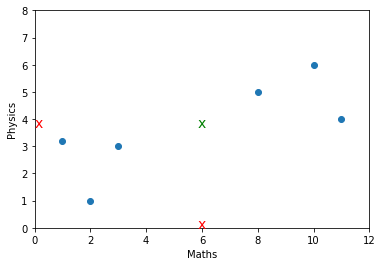

In [10]:
x = data.loc['Maths'].values
y = data.loc['Physics'].values

plt.scatter(x, y)

plt.annotate("x", (x.mean(), 0), color="red", fontsize=14)
plt.annotate("x", (0,y.mean()), color="red", fontsize=14)
plt.annotate("x", (x.mean(),y.mean()), color="green", fontsize=14)

plt.xlabel("Maths")
plt.ylabel("Physics")
plt.xlim(0,12)
plt.ylim(0,8)
plt.show()

Now, we will shoft the data so that the center is on the top of the origin in the graph.

This can be done by `Removing mean` as in the step below.
- Note that shifting the data won't disturb the relative positioning of the sample points in the data.

In [11]:
x = data.loc['Maths'].values
y = data.loc['Physics'].values

# Removing mean
x = x - np.mean(x)
y = y - np.mean(y)

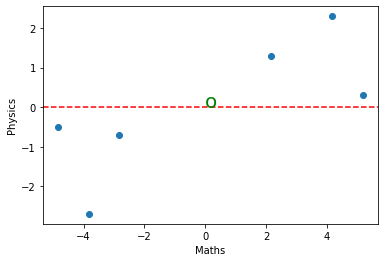

In [12]:
plt.scatter(x, y)
plt.axhline(y=0, linestyle='dashed', color='red')
plt.annotate("o", (x.mean(),y.mean()), color="green", fontsize=20)
plt.xlabel("Maths")
plt.ylabel("Physics")
plt.show()

Now the data is centered on the origin, we will try to fit a line to it.

First we start by fitting a random line to data given that it passess through the origin, and finds the best fitting line.

To quantify, how good the line fits, PCA projects the data points on the line and then it does either one of them:

1. Measure the distance from the data to the line and try to find the line that minimizes those distances.
2. Try to find the line that maximizes the distance from the projected points to the origin.

Minimizing the perpendicular distance from the point to the fitted line will maximizes the distance from the projected points to the origin.

But it is actually easier to calculate the distance from the projected point to the origin, so PCA finds the best line by *maximizing the squared distances from the projected points to the origin.*

Hence we can conclude that PCA starts with fitting a random line passing through origin,

1. projects the data onto it.
2. measures the distance from each projected point to the origin, say d1, d2, d3 and so on for every sample point in the data.
3. Squares all of the measured distances, d1^2, d2^2, d3^3...(doing so the effect of negative values won't cancel out by positive values).
4. Calculating thhe sum of squared  distances by adding all of the squared distances from previous step.
            
            SS(distances) = sum(d1^2, d2^2,....)
5. Repeat the steps 1-4 by rotating the line until it ends up with the largest SS(distances) between the projected points and the origin.

After getting 1st principal component, repeat the steps agains for 2nd principal component, given that it is perpendicular to the 1st component.

We will find this using the function provided by sklearn decomposition module.

In [13]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

In [14]:
rotated_data = pd.DataFrame(pca.components_, columns=data.columns, index=['PC1','PC2'])
rotated_data

,Student1,Student2,Student3,Student4,Student5,Student6
PC1,0.447661,0.783408,0.335746,-0.0,-0.246214,0.111915
PC2,0.411508,0.222689,-0.611669,0.0,0.637119,0.031813


In [15]:
pca_data

array([[ 4.46766158e+00,  1.57009246e-16],
       [-4.46766158e+00,  1.57009246e-16]])

In [16]:
pca.explained_variance_

array([3.99200000e+01, 4.93038066e-32])

In [17]:
pca.explained_variance_ratio_

array([1.00000000e+00, 1.23506529e-33])

The 1 unit vector long along the direction of a principal component is referred to as `Singluar Vector` or the `Eigen vector` of that component.

The values of these vector tells how much of the each of the variable contributed to the component. These proportion of each variables are called loading scores.


Below are the eigen vectors as computed by pca function.

In [18]:
print(f'Eigen Vector along PC1 : {pca_data[0]}')
print(f'Eigen Vector along PC2 : {pca_data[1]}')

Eigen Vector along PC1 : [4.46766158e+00 1.57009246e-16]
Eigen Vector along PC2 : [-4.46766158e+00  1.57009246e-16]


Note:
- The average of the Sum of Squared distaces for the best fit line as `Eigen value` for PC1.
- The square root of the Sum of the squared distances is called as `Singluar value` for PC1.

Eigen values gives the measure of variation of the variables in PCs.

Using sklearn function, they are given by:

In [19]:
print(f'Eigen value along PC1 : {pca.explained_variance_[0]}')
print(f'Eigen value along PC2 : {pca.explained_variance_[1]}')

Eigen value along PC1 : 39.92000000000001
Eigen value along PC2 : 4.930380657631326e-32


The total variation around both PCs are just the sum of both.

In [20]:
total_var = pca.explained_variance_.sum()
total_var

39.92000000000001

Dividing eigen value of a PC with the total variation arounf PCs gives how much a given PC accounts for total variation.

In [21]:
print(f'PC1 accounts for : {(pca.explained_variance_[0]/total_var)*100}%')
print(f'PC2 accounts for : {(pca.explained_variance_[1]/total_var)*100}%')

PC1 accounts for : 100.0%
PC2 accounts for : 1.2350652949978268e-31%


In [22]:
pca.explained_variance_ratio_

array([1.00000000e+00, 1.23506529e-33])

Here we make use of scree plot, which is a graphical representation of percentages of variation that each PC account for.

<BarContainer object of 2 artists>

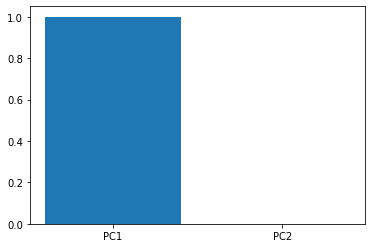

In [23]:
plt.bar(x = ['PC1', 'PC2'], height = pca.explained_variance_ratio_)

Now let's extend it to the data with three variables.
Consider this:

In [24]:
data2 = data.copy()
data2.loc['Statistics'] = [12,9,10,2.5,1.3,2]
data2.head()

,Student1,Student2,Student3,Student4,Student5,Student6
Maths,10.0,11.0,8.0,3.0,1.0,2.0
Physics,6.0,4.0,5.0,3.0,3.2,1.0
Statistics,12.0,9.0,10.0,2.5,1.3,2.0


Let's apply PCA, by following the steps above.

In [25]:
pca2 = PCA(n_components=3)
pca_data2 = pca2.fit_transform(data2)

In [26]:
pca2

PCA(n_components=3)

In [27]:
rotated_data2 = pd.DataFrame(pca2.components_, columns=data2.columns, index=['PC1','PC2', 'PC3'])
rotated_data2

,Student1,Student2,Student3,Student4,Student5,Student6
PC1,-0.561447,-0.646503,-0.451633,0.030548,0.223261,-0.109814
PC2,-0.469342,0.708209,-0.491057,0.139051,-0.131204,0.021715
PC3,-0.614669,0.144279,0.626269,-0.413526,0.195319,-0.000386


In [28]:
pca_data2

array([[-2.68191702e+00,  1.78779473e+00,  5.00135483e-16],
       [ 6.04528374e+00, -1.29486389e-01,  5.00135483e-16],
       [-3.36336672e+00, -1.65830834e+00,  5.00135483e-16]])

In [29]:
print(f'Eigen Vector along PC1 : {pca_data2[0]}')
print(f'Eigen Vector along PC2 : {pca_data2[1]}')
print(f'Eigen Vector along PC3 : {pca_data2[2]}')

Eigen Vector along PC1 : [-2.68191702e+00  1.78779473e+00  5.00135483e-16]
Eigen Vector along PC2 : [ 6.04528374e+00 -1.29486389e-01  5.00135483e-16]
Eigen Vector along PC3 : [-3.36336672e+00 -1.65830834e+00  5.00135483e-16]


Let's take PC1 first. 

In [33]:
print(f'Eigen Vector along PC1 : {pca_data2[0]}')

Eigen Vector along PC1 : [-2.68191702e+00  1.78779473e+00  5.00135483e-16]


PC1 is majorly comprised of variable# 2, 'Physics' followed by 'Statistics' and 'Maths'.

In [36]:
print(f'Eigen Vector along PC2 : {pca_data2[1]}')
print(f'Eigen Vector along PC3 : {pca_data2[2]}')

Eigen Vector along PC2 : [ 6.04528374e+00 -1.29486389e-01  5.00135483e-16]
Eigen Vector along PC3 : [-3.36336672e+00 -1.65830834e+00  5.00135483e-16]


Similarly, PC2 being perpendicular to PC1, is majorly comprised of 'Maths' and PC3 is perpendicular to both PC1, and PC2 and has greatest proportion for 'Statistics'.

If we had more variables in out data, we keep on finding more and more principal components by adding principal lines and rotating them until getting best fits according to the specified objective.

> **In theory, there is one principal component per each variable but in practice, the number of PCs is either number of variables or the number of samples, whichever is smaller.**

Once we have all the principal components figured out, we can use the eigen values (Sum of squared distances) to determine the proportion of variation that each PC account for. (Below is the working for it using sklearn functions).

In [43]:
total_var2 = pca2.explained_variance_.sum()

In [44]:
print(f'PC1 accounts for : {(pca2.explained_variance_[0]/total_var2)*100}%')
print(f'PC2 accounts for : {(pca2.explained_variance_[1]/total_var2)*100}%')
print(f'PC3 accounts for : {(pca2.explained_variance_[2]/total_var2)*100}%')

PC1 accounts for : 90.22678664377429%
PC2 accounts for : 9.773213356225702%
PC3 accounts for : 1.2299057648569933e-30%


This tells that:
- PC1 accounts for 90% of the variation.
- PC2 accounts for 9.7% of the variation.
- PC3 accountd for ~0% for the variation.

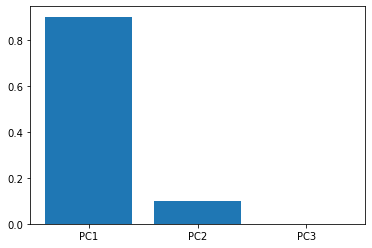

In [46]:
plt.bar(x = ['PC1', 'PC2', 'PC3'], height = pca2.explained_variance_ratio_)
plt.show()

PC1 and PC2 accounts for vast majority of the variation. That means that a 2D graph using only PC1 and PC2, would be agood approximation of the original 3D graph since it would account for 99.7% of the variation in the data.

After selecting the desired PCs, we convert the 3D graph to 2D graph by striping away the PC3 and original axis.
We will left with PC1, PC2 and data points. The data points needs to be projected on PC1 and PC2, and then spotting the position of the transformed point using the coordinate pair from the projection on each PC.

In [52]:
rotated_data2

,Student1,Student2,Student3,Student4,Student5,Student6
PC1,-0.561447,-0.646503,-0.451633,0.030548,0.223261,-0.109814
PC2,-0.469342,0.708209,-0.491057,0.139051,-0.131204,0.021715
PC3,-0.614669,0.144279,0.626269,-0.413526,0.195319,-0.000386


In [ ]:
x = data2.loc['Maths'].values
y = data2.loc['Physics'].values
z = data2.loc['Statistics'].values

a = rotated_data2.loc['PC1'].values
b = rotated_data2.loc['PC2'].values

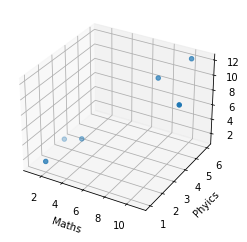

In [88]:
ax = plt.axes(projection ='3d')
ax.scatter3D(x, y, z)
plt.xlabel('Maths')
plt.ylabel('Phyics')
# plt.('Statistics')
plt.show()

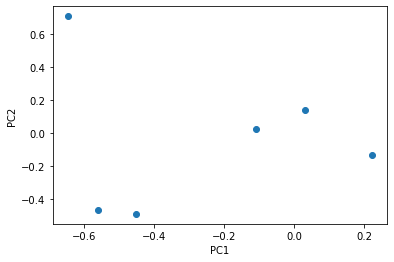

In [89]:
plt.scatter(a, b)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

`THE END`